In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, datasets
from tp_arbres_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,rand_checkers, rand_clown, plot_2d, frontiere_new)
import seaborn as sns
from matplotlib import rc
import collist

In [4]:
plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()

## Data Generation

In [7]:
np.random.seed(1)
n = 100
mu = [1., 1.]
sigma = [1., 1.]
rand_gauss(n, mu, sigma)
n1 = 20
n2 = 20
mu1 = [1., 1.]
mu2 = [-1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
data1 = rand_bi_gauss(n1, n2, mu1, mu2, sigma1, sigma2)
n1 = 50
n2 = 50
n3 = 50
mu1 = [1., 1.]
mu2 = [-1., -1.]
mu3 = [1., -1.]
sigma1 = [0.9, 0.9]
sigma2 = [0.9, 0.9]
sigma3 = [0.9, 0.9]
data2 = rand_tri_gauss(n1, n2, n3, mu1, mu2, mu3, sigma1, sigma2, sigma3)
n1 = 50
n2 = 50
sigma1 = 1.
sigma2 = 5.
data3 = rand_clown(n1, n2, sigma1, sigma2)
n1 = 114  # XXX : change
n2 = 114
n3 = 114
n4 = 114
sigma = 0.1
data4 = rand_checkers(n1, n2, n3, n4, sigma)

## Q1 : Mesure d'homogénéité pour une régression

Pour la régression on peut utiliser le critère de variance.

## Q2 

In [21]:
from sklearn import tree
from sklearn.model_selection import train_test_split

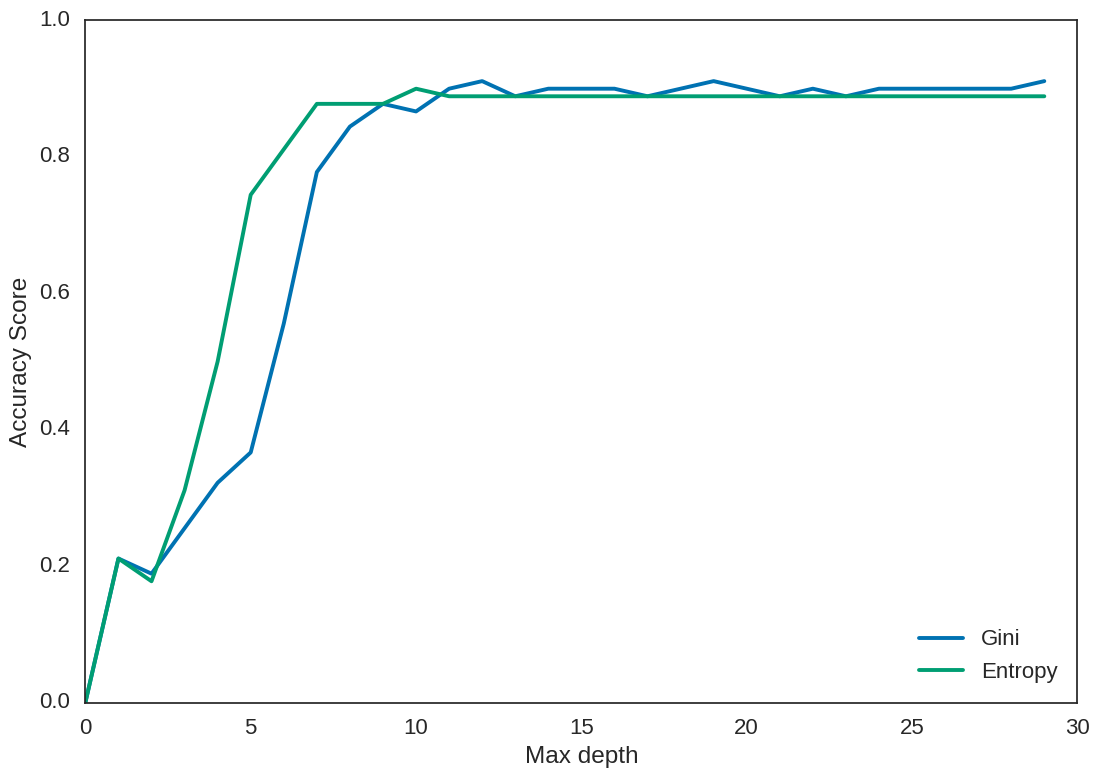

In [47]:
data = data4
X = data[:,:2]
Y = data[:,2]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

dmax = 30

scores = np.zeros(dmax)
plt.close(2)
plt.figure(2, figsize=(15, 10))

for d in range(1,dmax):
    dt = tree.DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train,Y_train)
    scores[d] = dt.score(X=X_test, y=Y_test)

scorese=np.zeros(dmax)
for d in range(1,dmax):
    dt = tree.DecisionTreeClassifier(max_depth=d, criterion='entropy')
    dt.fit(X_train,Y_train)
    scorese[d] = dt.score(X=X_test, y=Y_test)

fig, ax = plt.subplots()
plt.xlabel('Max depth')
plt.ylabel('Accuracy Score')
ax.plot(scores, label='Gini')
ax.plot(scorese, label='Entropy')
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

##  Q3 Afficher les frontières obtenues avec l'arbre pour le meilleur paramètre
Le meilleur paramêtre est Gini et profondeur = 19

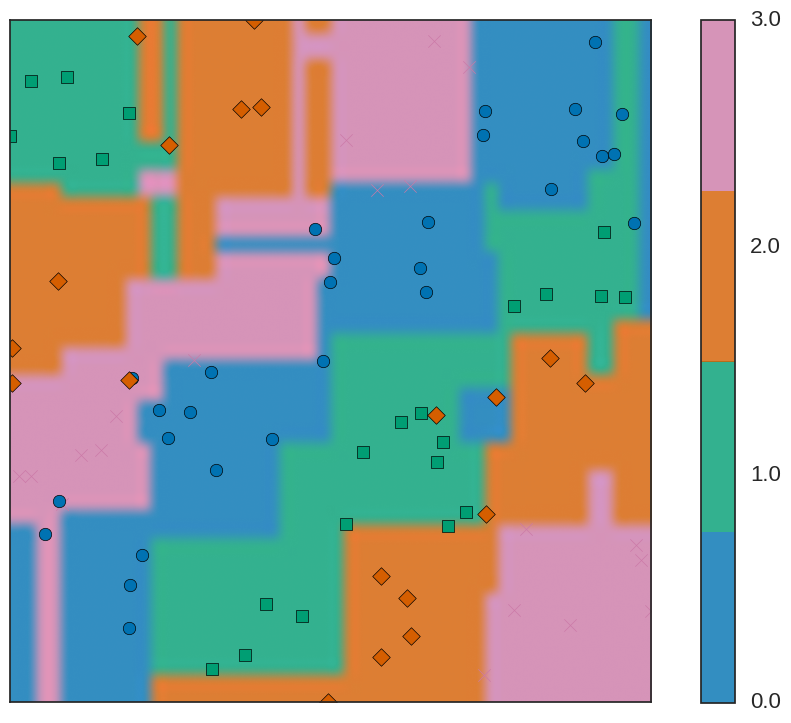

In [55]:
dt = tree.DecisionTreeClassifier(max_depth=19, criterion='gini')
dt.fit(X_train,Y_train)

def f(xx):
    return dt.predict(xx.reshape(1, -1))

plt.figure(1)
frontiere_new(f,X_test,Y_test)
plt.show()

## Q4 Exporter le graph

In [56]:
tree.export_graphviz(dt, out_file="myTestTree.dot", filled=True)
import os
os.system("dot -Tpdf myTestTree.dot -o myTestTree.pdf")
!open myTestTree.pdf
os.system("evince myTestTree.pdf")

Impossible d'obtenir le descripteur de fichier faisant référence à la console


0